This file is to measure trees! Enjoy :)

In [60]:
import re, glob
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

import skimage.segmentation as seg
import skimage.filters as filters
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

['./samples/Capture_Sample_1_17', './samples/Capture_Sample_1_19', './samples/Capture_Sample_1_21', './samples/Capture_Sample_1_20', './samples/Capture_Sample_1_18']


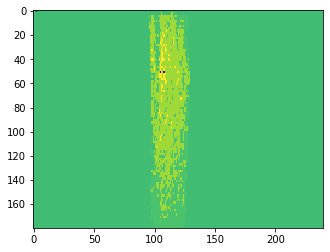

In [20]:
%matplotlib inline

TREE_DIR = './samples'
SHAPE = (180, 240)

def read_tree_sample(sample_num):
    sample_data = glob.glob('{0}/Capture_Sample_{1}*'.format(TREE_DIR, sample_num))
    
    data = {i: None for i in range(len(sample_data))}
    
    print(sample_data)
    
    for i, data_file in enumerate(sample_data):
        data[i] = np.genfromtxt(sample_data[i], delimiter=',')
    
    return data
    
    
def heatmap(sample_num, data_num):
    # Read in the data
    data = read_tree_sample(sample_num)
    d = data[data_num]
    return np.reshape(d[:,2], SHAPE)

    
    
plt.imshow(heatmap(1, 4))

['./samples/Capture_Sample_5_38', './samples/Capture_Sample_5_39', './samples/Capture_Sample_5_41', './samples/Capture_Sample_5_40', './samples/Capture_Sample_5_42']


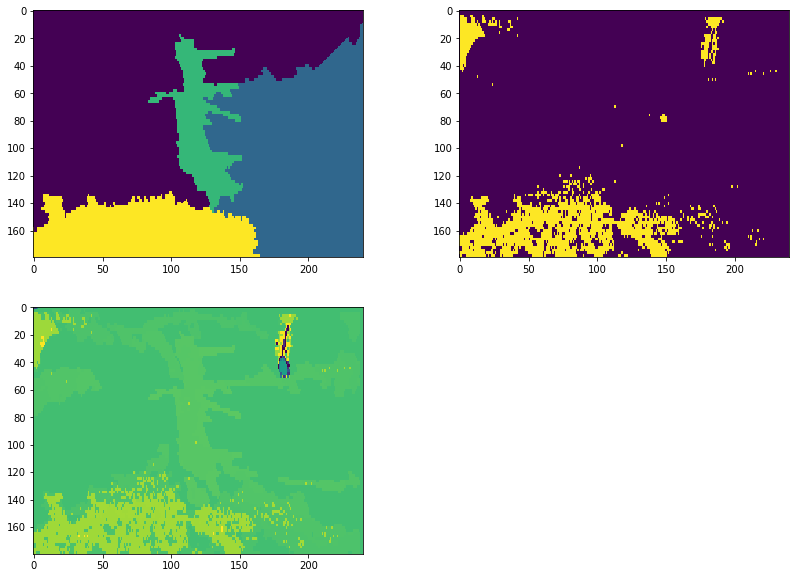

In [87]:
# Part 1: Simple image segmentation to estimate diameter from this angle
sample_num = 5
data_num = 2

def get_data(sample_num, data_num, confidence=False):
    data = read_tree_sample(sample_num)
    d = data[data_num]
    
    if confidence:
        im = np.reshape(d[:,2:], (*SHAPE, 2))
    else:
        im = np.reshape(d[:,2], SHAPE)
    return im
        
def segment_thresh(im):
    im_thresh = filters.threshold_otsu(im) 
    return im > im_thresh

def segment_slic(im):
    return seg.slic(im, n_segments=9, sigma=0.1)

def denoise_tv(im):
    return denoise_tv_chambolle(im, weight=0.3)

im = get_data(sample_num, data_num, confidence=True)
fig = plt.figure(2, figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(segment_slic(im[:,:,0]))
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(segment_thresh(denoise_tv(im[:,:,0])))
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(im[:,:,0])

['./samples/Capture_Sample_5_38', './samples/Capture_Sample_5_39', './samples/Capture_Sample_5_41', './samples/Capture_Sample_5_40', './samples/Capture_Sample_5_42']
['./samples/Capture_Sample_1_17', './samples/Capture_Sample_1_19', './samples/Capture_Sample_1_21', './samples/Capture_Sample_1_20', './samples/Capture_Sample_1_18']
['./samples/Capture_Sample_2_26', './samples/Capture_Sample_2_22', './samples/Capture_Sample_2_25', './samples/Capture_Sample_2_24', './samples/Capture_Sample_2_23']
['./samples/Capture_Sample_3_27', './samples/Capture_Sample_3_29', './samples/Capture_Sample_3_28']
['./samples/Capture_Sample_4_37', './samples/Capture_Sample_4_30', './samples/Capture_Sample_4_31', './samples/Capture_Sample_4_36', './samples/Capture_Sample_4_33', './samples/Capture_Sample_4_34', './samples/Capture_Sample_4_35', './samples/Capture_Sample_4_32']
['./samples/Capture_Sample_5_38', './samples/Capture_Sample_5_39', './samples/Capture_Sample_5_41', './samples/Capture_Sample_5_40', './s

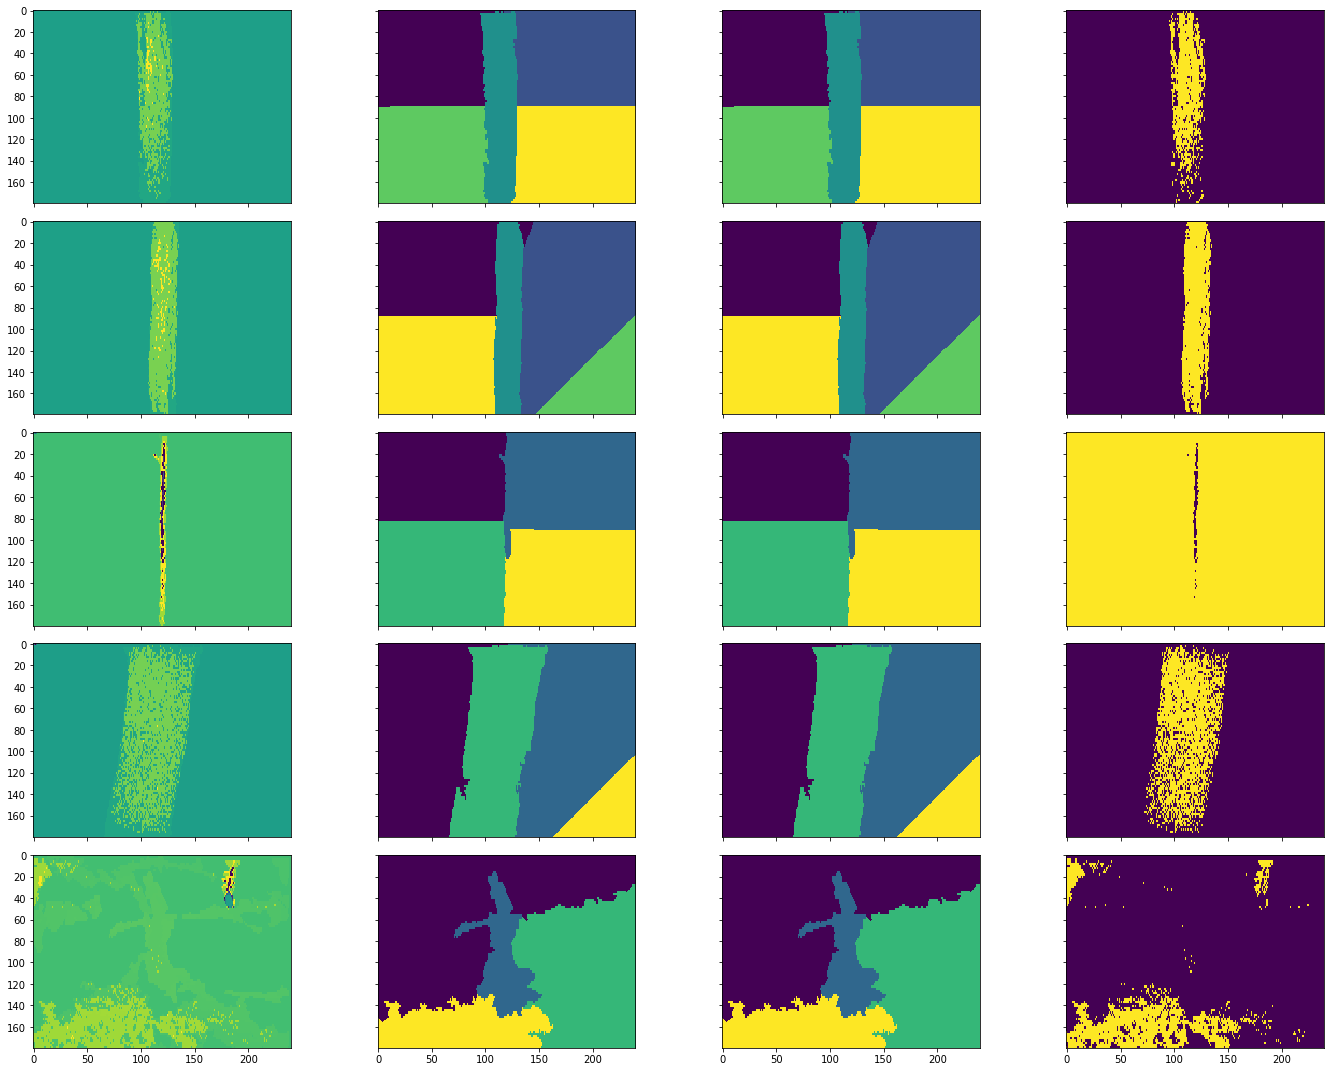

In [101]:
## Comparison of parameter variation for each data point


im = get_data(sample_num, data_num, confidence=True)
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15),
                       sharex=True, sharey=True)

for i in range(1, 6):
    im = get_data(i, 0, confidence=True)
    im_d = im[:,:,0]   # depth only, no confidence percent
    
    ax[i-1, 0].imshow(im_d)
    ax[i-1, 1].imshow(seg.slic(im_d, n_segments=9, sigma=0.1))
    ax[i-1, 2].imshow(seg.slic(im, n_segments=9, sigma=0.001, multichannel=True))
    ax[i-1, 3].imshow(segment_thresh(im_d))
    
fig.tight_layout()
plt.show()


In [ ]:
data = read_tree_sample(sample_num)
d = data[data_num]
im = np.reshape(d[:,2], SHAPE)
print()